# Zadatak 3: Vizuelizacija podataka

### Init

In [82]:
import matplotlib.pyplot as plt
from db.db import MysqlDAO
db = MysqlDAO('vozila')

## a) 10 najzastupljenijih lokacija koje imaju najveći broj automobila u ponudi

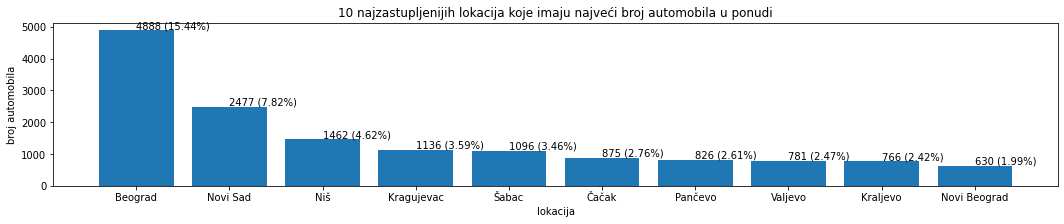

In [83]:
fig, ax = plt.subplots()
lokacije_prodavaca, vozila_counts = zip(*[(elem['lokacija_prodavca'], elem['cnt']) for elem in db.lokacija_count_top_10()])
vozila_count_total = db.vozila_count()
ax.bar(lokacije_prodavaca, vozila_counts)
ax.set_title("10 najzastupljenijih lokacija koje imaju najveći broj automobila u ponudi")
ax.set_xlabel("lokacija")
ax.set_ylabel("broj automobila")

fig.set_size_inches(18, 3)
for lokacija, cnt in zip(lokacije_prodavaca, vozila_counts):
    ax.annotate("{} ({:.2%})".format(cnt, cnt / vozila_count_total), xy=(lokacija, cnt + 50))

## b) Broj automobila prema kilometraži (po sledećim klasama: ispod 50 000, 50 000 do 99 999, 100 000 do 149 999, 150 000 do 199 999, 200 000 do 249 999, 250 000 do 299 999, preko 300 000)

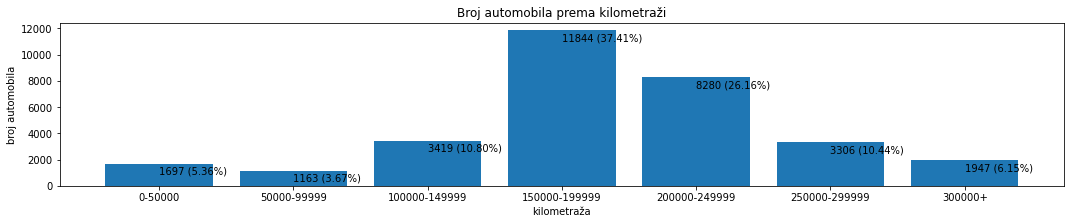

In [84]:
fig, ax = plt.subplots()
kilometraza, vozila_counts = zip(*[(elem['km'], elem['cnt']) for elem in db.opsezi_kilometraza()])
vozila_count_total = db.vozila_count()
ax.bar(kilometraza, vozila_counts)
ax.set_title("Broj automobila prema kilometraži")
ax.set_xlabel("kilometraža")
ax.set_ylabel("broj automobila")

fig.set_size_inches(18, 3)
for kilometraza, cnt in zip(kilometraza, vozila_counts):
    ax.annotate("{} ({:.2%})".format(cnt, cnt / vozila_count_total), xy=(kilometraza, cnt - 800))

## c) Broj automobila po godini proizvodnje (starije od 1960, 1961-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2005, 2006-2010, 2011-2015, 2016-2020, 2021-2022)

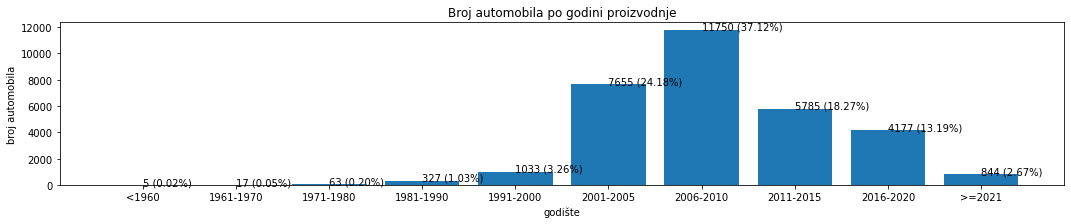

In [85]:
fig, ax = plt.subplots()
godiste, vozila_counts = zip(*[(elem['god'], elem['cnt']) for elem in db.opsezi_godista()])
vozila_count_total = db.vozila_count()
ax.bar(godiste, vozila_counts)
ax.set_title("Broj automobila po godini proizvodnje")
ax.set_xlabel("godište")
ax.set_ylabel("broj automobila")

fig.set_size_inches(18, 3)
for godiste, cnt in zip(godiste, vozila_counts):
    ax.annotate("{} ({:.2%})".format(cnt, cnt / vozila_count_total), xy=(godiste, cnt ))

## d) Broj (i procentualni odnos) automobila sa manuelnim ili automatskim menjačem

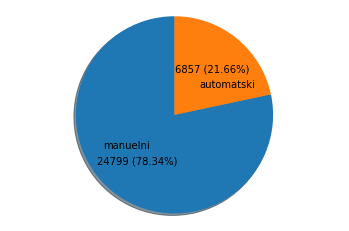

In [86]:
fig, ax = plt.subplots()
tipovi_menjaca, vozila_counts = zip(*[(elem['tip_menjaca'], elem['cnt']) for elem in db.tip_menjaca_counts()])

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}%)'.format(v=val, p=pct)
    return my_autopct

ax.pie(vozila_counts, labels=tipovi_menjaca, autopct=make_autopct(vozila_counts), shadow=True, startangle=90, labeldistance=0.4)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## d) Broj (i procentualni odnos) svih automobila za prodaju, koje po ceni pripadaju jednom od sledećih opsega: manje od 2000 €, između 2 000 i 4 999 €, između 5 000 i 9 999 €, između 10 000 € i 14 999 €, između 15 000 € i 19 999 €, između 20 000 € i 24 999 €, između 25 000 € i 29 999 €, 30 000 € ili više.

### Finalize

In [87]:
db.close()